In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [25]:
import jieba
with open('stopwords.txt','r',encoding='utf-8') as f:
    stopwords = f.readlines()
    stopwords = [x.rstrip() for x in stopwords]

# 1 draw wordcloud

## 1.1 lukin 2018

In [5]:
text1 = pd.read_csv('results_lukin_2018.csv',encoding='gb18030',index_col=4,parse_dates = ['发布时间'])

In [12]:
mask = np.array(Image.open('lukin.png'))
mask[np.where(mask == 0)]=255
mask[np.where(mask != 255)]=0

In [13]:
all_content = ''
xk = text1['正文'].apply(lambda x: ' '.join([word for word in jieba.lcut(x) if word not in stopwords and word not in r'[^\u4e00-\u9fa5]']))
for x in xk:
    all_content += x
    all_content += ' '
wc = WordCloud(font_path="C:/Windows/Fonts/FZSTK.ttf",
               max_font_size = 80,
               min_font_size = 15,
               background_color = "white",
               max_words = 200, 
               mask = mask,
               contour_width = 5,
               contour_color='steelblue').generate(all_content)

wc.to_file('./wordcloud/lukin_2018.png')


## 1.2 lukin 2022

In [62]:
text2 = pd.read_csv('results_lukin_2022.csv',encoding='utf-8',index_col=4,parse_dates = ['发布时间'])


c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (0,1,5,6,7,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:

mask = np.array(Image.open('lukin.png'))
mask[np.where(mask == 0)]=255
mask[np.where(mask != 255)]=0

all_content = ''
xk = text2['正文'].apply(lambda x: ' '.join([word for word in jieba.lcut(x) if word not in stopwords and word not in r'[^\u4e00-\u9fa5]']))
for x in xk:
    all_content += x
    all_content += ' '
wc = WordCloud(font_path="C:/Windows/Fonts/FZSTK.ttf",
               max_font_size = 80,
               min_font_size = 15,
               background_color = "white",
               max_words = 200, 
               mask = mask,
               contour_width = 5,
               contour_color='steelblue').generate(all_content)

wc.to_file('./wordcloud/lukin_2022.png')

## 1.3 starbuck 2018

In [59]:
text3 = pd.read_csv('results_2018(1).csv',encoding='utf-8',index_col=4,parse_dates = ['发布时间'],skiprows=5)

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (0,1,5,6,7,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
mask = np.array(Image.open('Starbucks.png'))
mask[np.where(mask == 0)]=255
mask[np.where(mask != 255)]=0

all_content = ''
xk = text3['正文'].apply(lambda x: ' '.join([word for word in jieba.lcut(x) if word not in stopwords and word not in r'[^\u4e00-\u9fa5]']))
for x in xk:
    all_content += x
    all_content += ' '
wc = WordCloud(font_path="C:/Windows/Fonts/FZSTK.ttf",
               max_font_size = 80,
               min_font_size = 10,
               background_color = "white",
               max_words = 200, 
               mask = mask,
               contour_width = 4,
               contour_color='green').generate(all_content)

wc.to_file('./wordcloud/starbuck_2018.png')

## 1.4 starbuck 2022

In [16]:
text4 = pd.read_csv('results_starbark_2022.csv',encoding='utf-8',index_col=4,parse_dates = ['发布时间'])

In [28]:
mask = np.array(Image.open('Starbucks.png'))
mask[np.where(mask == 0)]=255
mask[np.where(mask != 255)]=0

all_content = ''
xk = text4['正文'].apply(lambda x: ' '.join([word for word in jieba.lcut(x) if word not in stopwords and word not in r'[^\u4e00-\u9fa5]']))
for x in xk:
    all_content += x
    all_content += ' '
wc = WordCloud(font_path="C:/Windows/Fonts/FZSTK.ttf",
               max_font_size = 80,
               min_font_size = 10,
               background_color = "white",
               max_words = 200, 
               mask = mask,
               contour_width = 4,
               contour_color='green').generate(all_content)

wc.to_file('./wordcloud/starbuck_2022.png')

# 2 Add the sentiment tag to text

In [18]:
from snownlp import SnowNLP

In [19]:
text1['sentimate']=pd.Series() 
for i in range(text1.shape[0]):
    s = SnowNLP(text1['正文'][i])
    text1['sentimate'][i]=s.sentiments

text1.to_csv('lukin_2018_tag.csv')

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
text2['sentimate']=pd.Series() 
for i in range(text2.shape[0]):
    s = SnowNLP(text2['正文'][i])
    text2['sentimate'][i]=s.sentiments

text2.to_csv('lukin_2022_tag.csv')

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
text3['sentimate']=pd.Series() 
for i in range(text3.shape[0]):
    s = SnowNLP(text3['正文'][i])
    text3['sentimate'][i]=s.sentiments

text3.to_csv('starbuck_2018_tag.csv')

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
text4['sentimate']=pd.Series() 
for i in range(text4.shape[0]):
    s = SnowNLP(text4['正文'][i])
    text4['sentimate'][i]=s.sentiments

text4.to_csv('starbuck_2022_tag.csv')

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
day_2018_index = []
target_date_begin = datetime.datetime(2018,1,1,0,0,0)
target_date_end = datetime.datetime(2018,1,31,23,59,59)
day_2018_index.append(datetime.date(2018,1,1))
cur_text_1 = text1[text1.index>target_date_begin]
cur_text_1 = cur_text_1[cur_text_1.index<target_date_end]

In [38]:
cur_text_1['sentimate'].mean()

0.7222400695820407

# 3 Time trend of sentiment

In [ ]:
text2 = pd.read_csv('lukin_2022_tag.csv',encoding='utf-8',index_col=0,parse_dates = ['发布时间'])
text2 = text2.drop(text2.index[list(np.where(text2.index=='发布时间')[0])],axis=0)
text2.index = pd.to_datetime(text2.index)

In [ ]:
text3 = pd.read_csv('starbuck_2018_tag.csv',encoding='utf-8',index_col=0,parse_dates = ['发布时间'])
text3 = text3.drop(text3.index[list(np.where(text3.index=='发布时间')[0])],axis=0)
text3.index = pd.to_datetime(text3.index)

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (1,2,5,6,7,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
text4 = pd.read_csv('starbuck_2022_tag.csv',encoding='utf-8',index_col=0,parse_dates = ['发布时间'])
text4 = text4.drop(text4.index[list(np.where(text4.index=='发布时间')[0])],axis=0)
text4.index = pd.to_datetime(text4.index)

In [101]:
day_2018_index = []
day_2022_index = []
day_sentiment_lukin_2018_av = []
day_sentiment_lukin_2022_av = []
day_sentiment_starbuck_2018_av = []
day_sentiment_starbuck_2022_av = []
day_of_month = [31,28,31,30,31,30,31,31,30,31,30,31]
for month in range(1,13):
  #  for day in range(1,day_of_month[month-1]+1):
    target_date_begin = datetime.datetime(2018,month,1,0,0,0)
    target_date_end = datetime.datetime(2018,month,day_of_month[month-1],23,59,59)
    day_2018_index.append(datetime.date(2018,month,1))
    cur_text_1 = text1[text1.index>target_date_begin]
    cur_text_1 = cur_text_1[cur_text_1.index<target_date_end]
    day_sentiment_lukin_2018_av.append(cur_text_1['sentimate'].mean())
    cur_text_3 = text3[text3.index>target_date_begin]
    cur_text_3 = cur_text_3[cur_text_3.index<target_date_end]
    day_sentiment_starbuck_2018_av.append(cur_text_3['sentimate'].mean())
for month in range(1,9):
    target_date_begin = datetime.datetime(2022,month,1,0,0,0)
    target_date_end = datetime.datetime(2022,month,day_of_month[month-1],23,59,59)
    day_2022_index.append(datetime.date(2022,month,1))
    cur_text_2 = text2[text2.index>target_date_begin]
    cur_text_2 = cur_text_2[cur_text_2.index<target_date_end]
    day_sentiment_lukin_2022_av.append(cur_text_2['sentimate'].mean())
    cur_text_4 = text4[text4.index>target_date_begin]
    cur_text_4 = cur_text_4[cur_text_4.index<target_date_end]
    day_sentiment_starbuck_2022_av.append(cur_text_4['sentimate'].mean())

In [ ]:
from scipy import interpolate

In [123]:
date_start = datetime.date(2018,1,1)
date_end = datetime.date(2018,12,31)
date_list = []
while date_start<=date_end:
    date_list.append(date_start)
    date_start+=datetime.timedelta(days=+1)


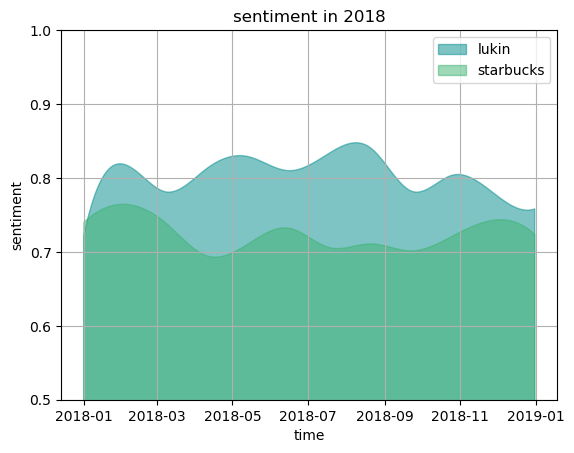

In [125]:
x= list(range(len(day_2018_index)))
xnew = np.linspace(0,11,365)
f1 = interpolate.interp1d(x,day_sentiment_lukin_2018_av,kind='cubic')
lukin_new = f1(xnew)
f2 = interpolate.interp1d(x,day_sentiment_starbuck_2018_av,kind='cubic')
starbuck_new = f2(xnew)
fig = plt.figure()
ax=fig.subplots()
line1 = ax.fill_between(date_list,lukin_new,color='darkcyan',alpha=0.5)
line2 = ax.fill_between(date_list,starbuck_new,color='mediumseagreen',alpha=0.5)
plt.ylim(0.5,1)
plt.xlabel('time')
plt.ylabel('sentiment')
plt.title('sentiment in 2018')
plt.legend([line1,line2],['lukin','starbucks'],loc='upper right')
plt.grid(True)
plt.savefig('./wordcloud/sentiment_trend_polate_2018.png')
plt.show()

In [128]:
date_start = datetime.date(2022,1,1)
date_end = datetime.date(2022,8,31)
date_list = []
while date_start<=date_end:
    date_list.append(date_start)
    date_start+=datetime.timedelta(days=+1)

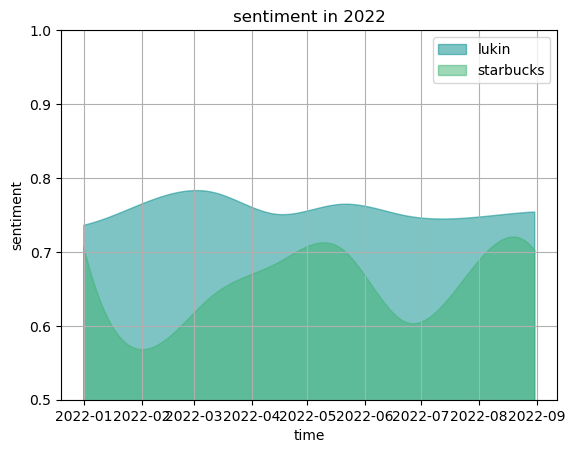

In [133]:
x= list(range(len(day_2022_index)))
xnew = np.linspace(0,7,len(date_list))
f1 = interpolate.interp1d(x,day_sentiment_lukin_2022_av,kind='cubic')
lukin_new = f1(xnew)
f2 = interpolate.interp1d(x,day_sentiment_starbuck_2022_av,kind='cubic')
starbuck_new = f2(xnew)
fig = plt.figure()
ax=fig.subplots()
line1 = ax.fill_between(date_list,lukin_new,color='darkcyan',alpha=0.5)
line2 = ax.fill_between(date_list,starbuck_new,color='mediumseagreen',alpha=0.5)
plt.ylim(0.5,1)
plt.xlabel('time')
plt.ylabel('sentiment')
plt.title('sentiment in 2022')
plt.legend([line1,line2],['lukin','starbucks'],loc='upper right')
plt.grid(True)
plt.savefig('./wordcloud/sentiment_trend_polate_2022.png')
plt.show()

# 4 starbuck at 2022

In [ ]:
import re
import collections

In [139]:
target_date_begin = datetime.datetime(2022,2,1,0,0,0)
target_date_end = datetime.datetime(2022,2,28,23,59,59)

low_sent1 = text4[text4.index>target_date_begin]
low_sent1 = low_sent1[low_sent1.index<target_date_end]

feb = low_sent1.iloc[np.where(low_sent1['sentimate']<0.5)[0],:].round(4)

In [145]:
content = ''
for i in range(len(feb['正文'])):
    content += feb['正文'][i]

tag_pat = re.compile('#(.*?)#')
tag_list = tag_pat.findall(content)

word_counts = collections.Counter(tag_list) 
word_counts_top = word_counts.most_common(11)
print(word_counts_top)

In [153]:
word_counts_top

[('星巴克发文致歉', 532),
 ('星巴克驱赶执勤民警', 315),
 ('星巴克涨价', 313),
 ('星巴克客服回应民警在门口吃盒饭被赶走', 313),
 ('', 247),
 ('重庆涉事星巴克门店被送白花扔鸡蛋', 120),
 ('星巴克', 112),
 (' jjy', 102),
 ('星巴克还值得买吗', 98),
 ('星巴克中国启动调查驱赶民警事件', 75),
 ('人民网评星巴克赶走民警', 69)]

In [154]:
target_date_begin = datetime.datetime(2022,7,1,0,0,0)
target_date_end = datetime.datetime(2022,7,31,23,59,59)

low_sent2 = text4[text4.index>target_date_begin]
low_sent2 = low_sent2[low_sent2.index<target_date_end]

july = low_sent2.iloc[np.where(low_sent2['sentimate']<0.5)[0],:].round(4)

In [173]:
content = ''
for i in range(len(july['正文'])):
    content += july['正文'][i]

tag_pat = re.compile('#(.*?)#')
tag_list = tag_pat.findall(content)

word_counts = collections.Counter(tag_list) 
word_counts_top = word_counts.most_common(50)
# print(word_counts_top)

In [172]:
selected_tag_list = [i for i in word_counts_top if not ("鞠婧祎" in i[0] or "jjy" in i[0])]
print(selected_tag_list)

[('', 151), ('星巴克', 56), (' ', 35), ('饿了么免单', 22), ('饿了么超级限定', 17), ('俄版星巴克将改名后重开', 16), ('店长制止进店乱骂女子被暴打', 14), ('女子进星巴克见人就骂小三', 13), ('城市冰爽随行', 10), (' 🍊', 7), ('咖啡', 7), (' \u200b', 6), ('杭州夏季清凉打卡地', 6), ('饿了么免单1分钟', 5), ('】', 5), ('宁波身边事', 4), ('宁波天一国购星巴克冰块多', 4), ('热美式和中药的区别', 4), ('饿了么', 4), ('星巴克杯子', 3), ('星巴克的冰震浓缩太上头了', 3), ('杭州租房', 3), ('星巴克加盟', 3), ('星巴克加盟费', 3)]


In [180]:
july.columns

Index(['微博id', '用户id', '用户名', '正文', '转发数', '评论数', '点赞数', '用户粉丝数', '用户关注数',
       '用户推文数', '用户地址', '微博网址', '评论', 'sentimate'],
      dtype='object')

In [182]:
content_list = []
for i in range(len(july['正文'])):
    t = july['正文'][i]
    if ("鞠婧祎" in t or "jjy" in t):
        content_list.append(tuple([t,july['sentimate'][i]]))

In [183]:
content_list

[('\ue627鞠婧祎#鞠婧祎仙剑奇侠传四# jjy#鞠婧祎魏枝# jjy#鞠婧祎韩菱纱# 她没开自动回复不是因为小气，她每天工作很少玩儿手机，她的空余时间还会练小提琴，她也许是没看到，虽然很希望看到她vb回应，但我更希望她把那9800花自己身上，她若真的小气当年就不会花十几万买星巴克，而且还是不是飞黄腾 \u200b  展开c',
  0.0),
 ('\ue627鞠婧祎#鞠婧祎仙剑奇侠传四# jjy#鞠婧祎魏枝# jjy#鞠婧祎韩菱纱# 她没开自动回复不是因为小气，她每天工作很少玩儿手机，她的空余时间还会练小提琴，她也许是没看到，虽然很希望看到她vb回应，但我更希望她把那9800花自己身上，她若真的小气当年就不会花十几万买星巴克，而且还是不是飞黄腾 \u200b  展开c',
  0.0),
 ('\ue627鞠婧祎#鞠婧祎仙剑奇侠传四# jjy#鞠婧祎魏枝# jjy#鞠婧祎韩菱纱# 她没开自动回复不是因为小气，她每天工作很少玩儿手机，她的空余时间还会练小提琴，她也许是没看到，虽然很希望看到她vb回应，但我更希望她把那9800花自己身上，她若真的小气当年就不会花十几万买星巴克，而且还是不是飞黄腾 \u200b  展开c',
  0.0),
 ('\ue627鞠婧祎#鞠婧祎仙剑奇侠传四# jjy#鞠婧祎魏枝# jjy#鞠婧祎韩菱纱# 她没开自动回复不是因为小气，她每天工作很少玩儿手机，她的空余时间还会练小提琴，她也许是没看到，虽然很希望看到她vb回应，但我更希望她把那9800花自己身上，她若真的小气当年就不会花十几万买星巴克，而且还是不是飞黄腾 \u200b  展开c',
  0.0),
 ('\ue627鞠婧祎#鞠婧祎仙剑奇侠传四# jjy#鞠婧祎韩菱纱# “白色话筒 橘子项链 给粉丝买星巴克 挥手再见 我们的爱从来不是单向恋”@鞠婧祎 \u200b',
  0.1904),
 ('\ue627鞠婧祎jjy#鞠婧祎魏枝# jjy#鞠婧祎花戎# "白色话筒橘子项链给粉丝买星巴克挥手再见我们的爱从来不是单向恋"@鞠婧祎 【图源见水印】 \u200b',
  0.2418),
 ('\ue627鞠婧祎jjy#鞠婧祎花戎# jjy#鞠婧祎韩菱纱# “白色话筒 橘子项链 给粉丝买星巴克 挥手再见 我们的爱从来不是单向恋” \u200b\u200b\u200b@鞠婧祎 \